# Softmax Function

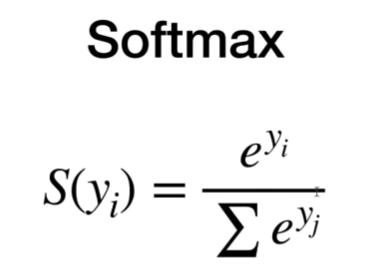

- Squash the output between 0 and 1.
- Add up to 1.
- To sovle Negative value problem, we can use the exponential function.

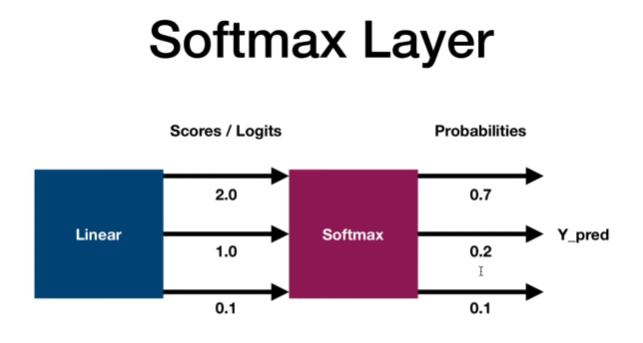


In [ ]:
#
#        -> 2.0              -> 0.65
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

In [8]:
# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [9]:
x = np.array([2.0, 1.0, 0.1])
print(x)
outputs = softmax(x)
print('softmax numpy:', outputs)

[2.  1.  0.1]
softmax numpy: [0.65900114 0.24243297 0.09856589]


In [ ]:
x = torch.tensor([2.0, 1.0, 0.1])
print(x)
outputs = torch.softmax(x, dim=0)  # along values along first axis
print('softmax torch:', outputs)

tensor([2.0000, 1.0000, 0.1000])
softmax torch: tensor([0.6590, 0.2424, 0.0986])


# Cross Entropy

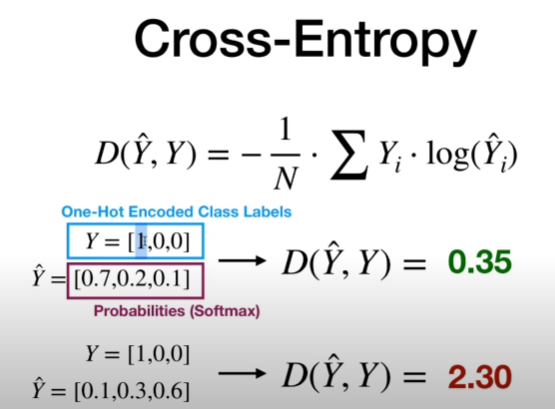

- Cross-entropy loss, or log loss, measures the performance of a multi-class classification model
- whose output is a probability value between 0 and 1.
- loss increases as the predicted probability diverges from the actual label


The line `predicted = np.clip(predicted, EPS, 1 - EPS)` is used to ensure that the predicted probabilities are within a valid range for the logarithm operation in the cross-entropy calculation. Here’s a detailed explanation:

### Why `np.clip` is Needed

In the context of cross-entropy loss, we compute the logarithm of the predicted probabilities. Logarithms are undefined for zero and negative values, and they tend to produce very large negative values for probabilities very close to zero, which can cause numerical instability.

### What `np.clip` Does

The `np.clip` function restricts the values in the `predicted` array to lie within a specified range. In this case, it ensures that all predicted probabilities are between `EPS` (a very small positive value) and `1 - EPS` (a value slightly less than 1).

- `EPS = 1e-15` is a small constant to prevent taking the log of zero.
- `1 - EPS` ensures that we don’t take the log of one, which would result in log(0) for the complementary class in multi-class classification.

### Concrete Example

Suppose we have the following predicted probabilities for a binary classification problem:

```python
predicted = np.array([0.0, 0.2, 0.8, 1.0])
actual = np.array([1, 0, 1, 0])
```

Without clipping, the predicted probabilities are:

- `[0.0, 0.2, 0.8, 1.0]`

Taking the logarithm of 0 or 1 directly will cause issues:

- `log(0)` is undefined and results in `-inf`.
- `log(1)` is 0, which is fine, but for `1 - predicted` it would be problematic.

### Applying `np.clip`

When we apply `np.clip(predicted, EPS, 1 - EPS)`, the values are adjusted to be within the range `[EPS, 1 - EPS]`:

```python
EPS = 1e-15
predicted = np.clip(predicted, EPS, 1 - EPS)
```

Result:

- `[1e-15, 0.2, 0.8, 1 - 1e-15]`
- Which is approximately `[1e-15, 0.2, 0.8, 0.999999999999999]`

Now, these values can safely be used in the logarithm calculation without causing numerical issues.

### Complete Function with Explanation

```python
import numpy as np

def cross_entropy(actual, predicted):
    EPS = 1e-15  # Small constant to avoid log(0)
    # Clip predicted values to be within the range [EPS, 1-EPS]
    predicted = np.clip(predicted, EPS, 1 - EPS)
    # Compute the cross-entropy loss
    loss = -np.sum(actual * np.log(predicted))
    return loss

# Example usage
actual = np.array([1, 0, 1, 0])
predicted = np.array([0.0, 0.2, 0.8, 1.0])
loss = cross_entropy(actual, predicted)
print(f"Cross-Entropy Loss: {loss}")
```

In this example:

- For `predicted = [0.0, 0.2, 0.8, 1.0]`, after clipping, it becomes `[1e-15, 0.2, 0.8, 0.999999999999999]`.
- This ensures that the logarithm operation in the cross-entropy calculation does not encounter undefined values or extreme negative values, leading to a stable and correct loss calculation.


In [ ]:
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss  # / float(predicted.shape[0])

In [ ]:
# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


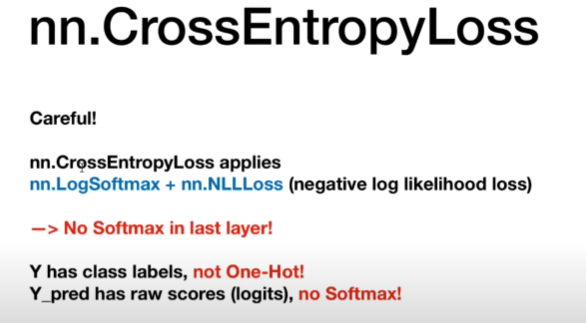


In [13]:
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

In [14]:
# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

In [ ]:
# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

In [16]:
print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406


In [ ]:
# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)  # along values along first axis
_, predictions2 = torch.max(Y_pred_bad, 1)
print(
    f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [ ]:
# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

In [ ]:
# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9],  # predict class 2
     [1.2, 0.1, 0.3],  # predict class 0
     [0.3, 2.2, 0.2]])  # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
     [0.1, 0.3, 1.5],
     [1.2, 0.2, 0.5]])

In [20]:
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418


In [21]:
# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


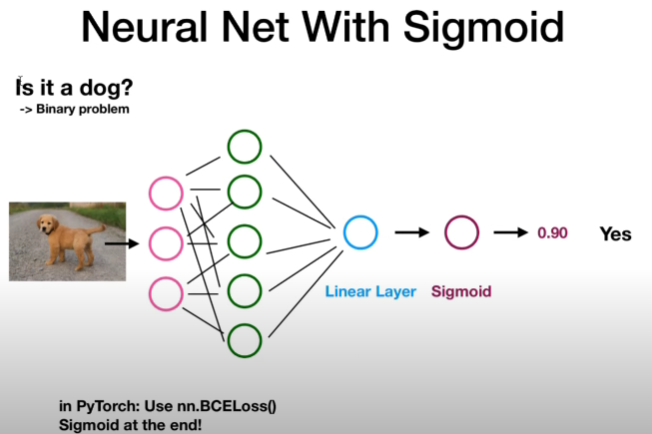


In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

In [25]:
model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

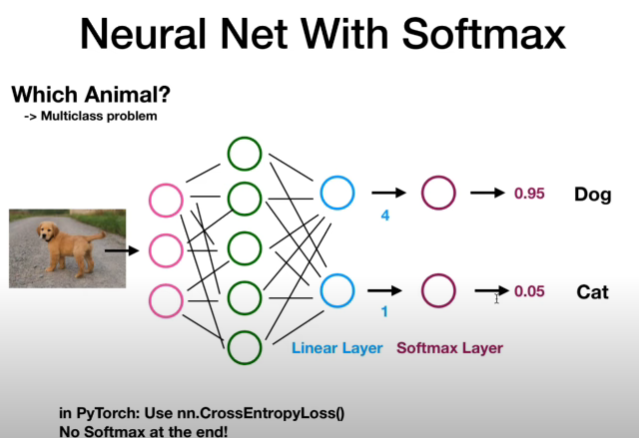


In [ ]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

In [27]:
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)